In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

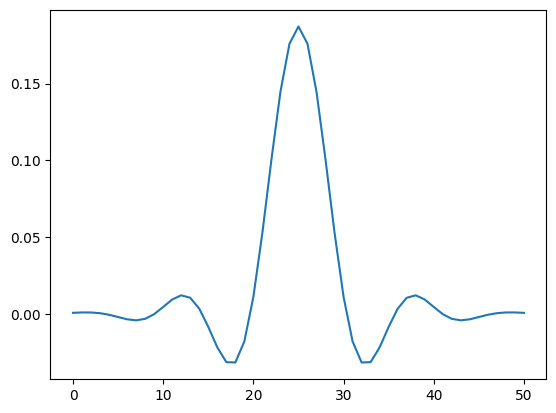

In [2]:
num_taps = 51
cutoff = 3000
fs = 32000
fir_coeff = signal.firwin(num_taps, cutoff, fs=fs)
plt.plot(fir_coeff)

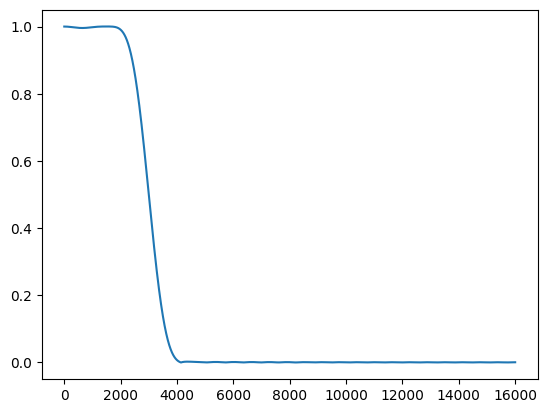

In [3]:
w, h = signal.freqz(fir_coeff, worN=8000, fs=fs)
plt.plot(w, np.abs(h))

In [4]:
N = 1024
H = np.fft.fftshift(np.abs(np.fft.fft(fir_coeff, N)))
freqs = np.fft.fftshift(np.fft.fftfreq(N, d=1/fs))

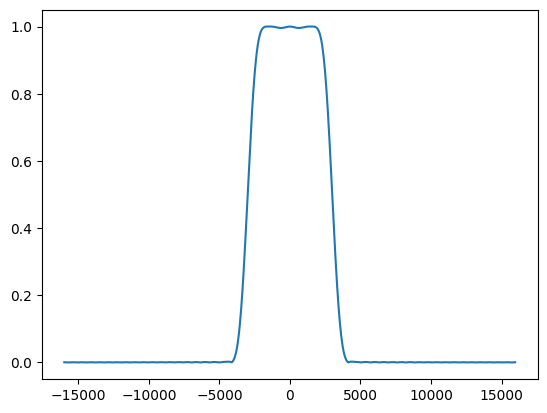

In [5]:
plt.figure(0)
plt.plot(freqs, H, label='FFT Magnitude')
plt.show()

In [6]:
Ts = 1.0/fs
t = np.arange(0.0, Ts * len(fir_coeff), Ts)
f0 = 5000
h_bp = fir_coeff * np.exp(2j*np.pi*f0*t)

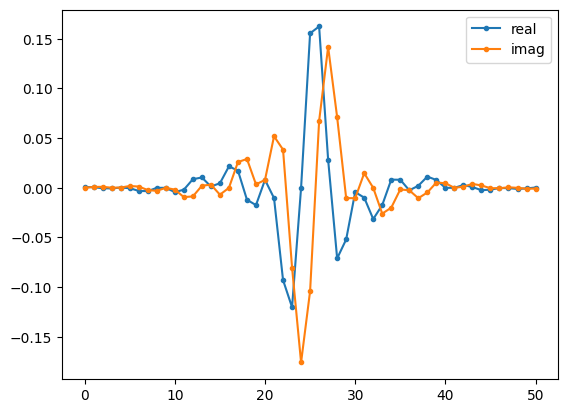

In [7]:
plt.figure('impulse')
plt.plot(np.real(h_bp), '.-')
plt.plot(np.imag(h_bp), '.-')
plt.legend(['real', 'imag'], loc=1)

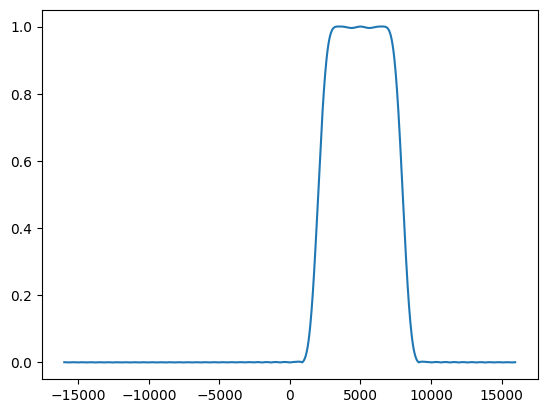

In [8]:
H_bp = np.fft.fftshift(np.abs(np.fft.fft(h_bp, N)))
plt.figure('freq')
plt.plot(freqs, H_bp, label='FFT Magnitude')
plt.show()

In [9]:
# band-pass filter from 100-200 kHz, sample rate of 1 MHz
sample_rate = 1e6
h = signal.firwin(101, [100e3, 200e3], pass_zero=False, fs = sample_rate)

In [10]:
# bp filter with LP region up to 100 kHz, separate BP from 200-300 kHz but at half the gain, and transition width of 10 kHz
freqs = [0, 100e3, 110e3, 190e3, 200e3, 300e3, 310e3, 500e3]
gains = [1, 1,      0,     0,     0.5,   0.5,  0,     0]
h2 = signal.firwin2(101, freqs, gains, fs=sample_rate)

[-0.00051693-6.04586955e-05j  0.00121292+1.99005557e-04j]
[-0.00051693-6.04586955e-05j  0.00121292+1.99005557e-04j]
[-0.00051693-6.04586955e-05j  0.00121292+1.99005557e-04j]
[-0.00051693-6.04586955e-05j  0.00121292+1.99005557e-04j]


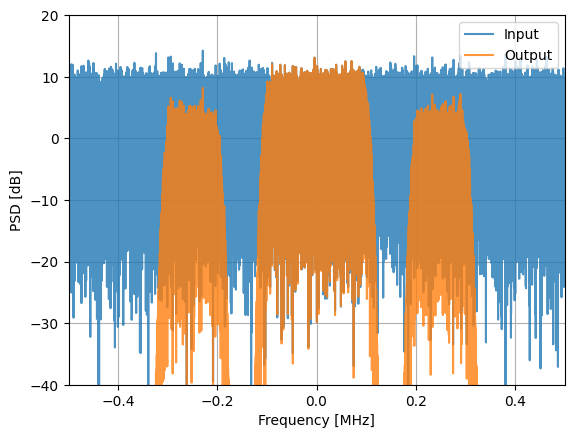

In [11]:
# testing the four convolution functions
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin2, convolve, fftconvolve, lfilter

# Create a test signal (Gaussian noise)
sample_rate = 1e6  # Hz
N = 1000
x = np.random.randn(N) + 1j * np.random.randn(N)

# Create an FIR filter
freqs = [0, 100e3, 110e3, 190e3, 200e3, 300e3, 310e3, 500e3]
gains = [1, 1, 0, 0, 0.5, 0.5, 0, 0]
h2 = firwin2(101, freqs, gains, fs=sample_rate)

# Apply filter using different methods
x_numpy = np.convolve(h2, x)
x_scipy = convolve(h2, x)
x_fft_convolve = fftconvolve(h2, x)
x_lfilter = lfilter(h2, 1, x)

print(x_numpy[0:2])
print(x_scipy[0:2])
print(x_fft_convolve[0:2])
print(x_lfilter[0:2])

#---------------------------------------------------------

# Simulate longer signal for PSD
N = 100000
x = np.random.randn(N) + 1j * np.random.randn(N)

# Input PSD
PSD_input = 10 * np.log10(np.fft.fftshift(np.abs(np.fft.fft(x))**2) / len(x))

# Apply filter
x = fftconvolve(x, h2, 'same')

# Output PSD
PSD_output = 10 * np.log10(np.fft.fftshift(np.abs(np.fft.fft(x))**2) / len(x))
f = np.linspace(-sample_rate/2/1e6, sample_rate/2/1e6, len(PSD_output))

# Plot input vs output PSD
plt.plot(f, PSD_input, alpha=0.8)
plt.plot(f, PSD_output, alpha=0.8)
plt.xlabel('Frequency [MHz]')
plt.ylabel('PSD [dB]')
plt.axis([sample_rate/-2/1e6, sample_rate/2/1e6, -40, 20])
plt.legend(['Input', 'Output'], loc=1)
plt.grid()
plt.savefig('fftconvolve.svg', bbox_inches='tight')
plt.show()


in scipy, linear filter z_i sets the initial conditions for filtering streaming (ex. streamed contiguous chunks of samples)

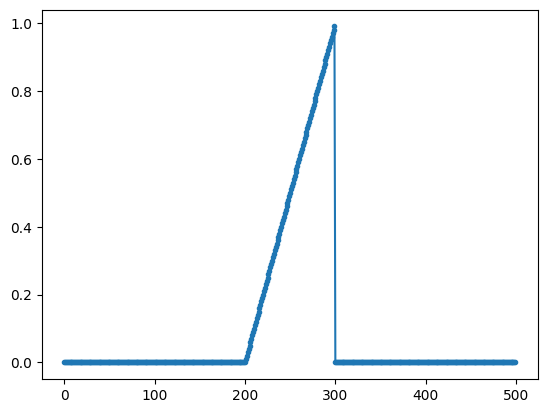

In [29]:
#H = np.concatenate([np.zeros(10), np.arange(10), np.zeros(10)])/10
H = np.hstack((np.zeros(200), np.arange(100)/100, np.zeros(200)))

plt.plot(H, '.-')
plt.show()

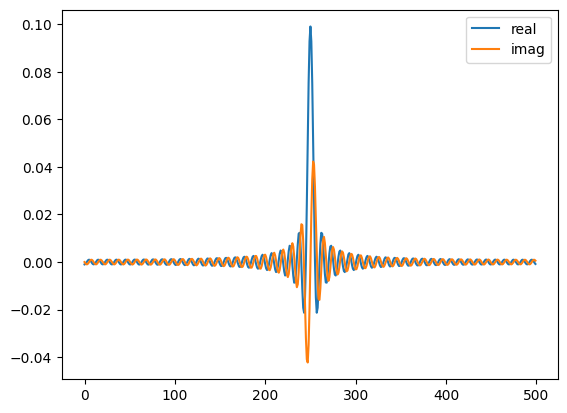

In [30]:
h = np.fft.ifftshift(np.fft.ifft(np.fft.ifftshift(H)))
plt.plot(np.real(h))
plt.plot(np.imag(h))
plt.legend(['real', 'imag'], loc=1)
plt.show()

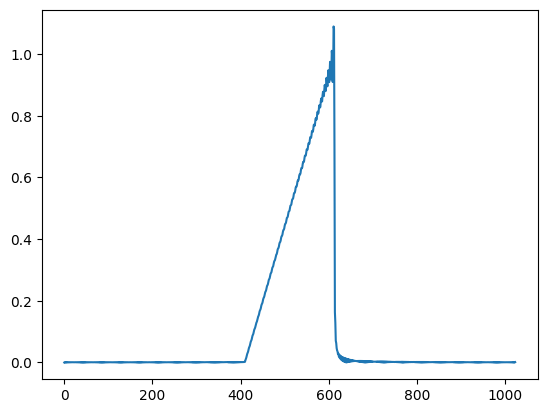

In [31]:
H_fft = np.fft.fftshift(np.abs(np.fft.fft(h, 1024)))
plt.plot(H_fft)
plt.show()

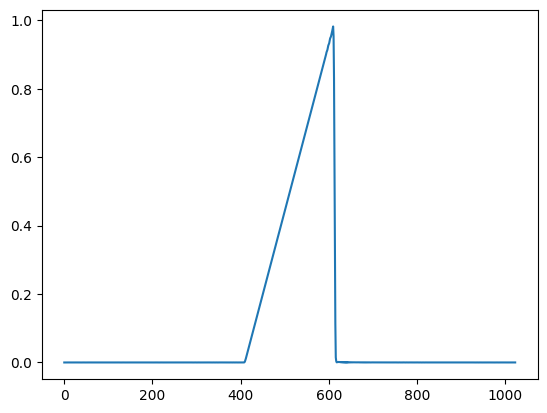

In [32]:
window = np.hamming(len(h))
h = h * window
H_fft = np.fft.fftshift(np.abs(np.fft.fft(h, 1024)))
plt.plot(H_fft)
plt.show()